Where a new version of the switching model was tested to improve code effeciency

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
from scipy.special import iv
from scipy import stats
import random
from scipy import integrate

In [4]:
def GBM(mu,sigma,T,s0):
    t= np.linspace(0,T,100)
    step = T/len(t)
    stock = s0
    for i in range(len(t)):
      z = np.random.normal(0,1)
      stock = stock * np.exp((mu- 0.5 * sigma**2)*step + sigma*np.sqrt(step)*z)
    return stock


def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2 / 2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T)* norm.cdf(d2)

In [434]:
s0=100
K=120
T=1
mu = 0.3
r=mu
sigma=0.3
observed_price = np.zeros(1000)
for i in range(1000):
    observed_price[i] = max(GBM(mu,sigma,T,s0)-K,0)

op = np.mean(observed_price) * np.exp(-r*T)

print('op',op)
print('BS',BS_CALL(s0, K, T, r, sigma))

op 17.47284624805274
BS 17.660433464039336


In [445]:
def GBM_WSNEW(mu,sigmas,T,s0,Q):
    #np.random.seed(100)
    t = np.linspace(0, T, 100)
    step = T/len(t)
    stock = s0
    states = list(range(len(Q)))
    current = np.random.choice(states,p=[1,0])
    
    sigma = sigmas[current]
    s = [s0]
    z = np.random.exponential(1 / abs(Q[current][current]))
    length = 0
    for i in range(len(t)):
        length += step
        if length >= z:
            length = 0
            p = Q[current] / abs(Q[current][current]) 
            probs = [pr if pr >= 0 else 0 for pr in p]
            current = np.random.choice(states, p=probs)
            sigma = sigmas[current]
            z = np.random.exponential(1 / abs(Q[current][current]))
        eta = np.random.normal(0, 1)
        stock =stock * np.exp((mu - 0.5 * sigma**2) * step + sigma * np.sqrt(step) * eta)
    return stock

In [446]:
def GBM_WSNEWst(mu,sigmas,T,s0,Q):

    t = np.linspace(0, T, 100)
    step = T/len(t)
    stock = s0
    states = list(range(len(Q)))
    current = np.random.choice(states,p=[2/3,1/3]) 
    sigma = sigmas[current]
    z = np.random.exponential(1 / abs(Q[current][current])) 
    length = 0
    for i in range(len(t)):
        length += step
        if length >= z:
            length = 0
            p = Q[current] / abs(Q[current][current]) 
            probs = [pr if pr >= 0 else 0 for pr in p]
            current = np.random.choice(states, p=probs)
            sigma = sigmas[current]
            z = np.random.exponential(1 / abs(Q[current][current]))
        eta = np.random.normal(0, 1)
        stock = stock * np.exp((mu - 0.5 * sigma**2) * step + sigma * np.sqrt(step) * eta)
    
        
    
    return stock

In [17]:
def phi(x,S0,sigmas,r,t,T):
    v = (sigmas[0]**2-sigmas[1]**2)*t + sigmas[1]**2 *T
    m = np.log(S0)+(r*T- (1/2 *v))
    return norm.pdf(x,m,np.sqrt(v))

def f0(Q,T,t):
    lam0 = abs(Q[0][0])
    lam1 = abs(Q[1][1])
    d=1
    sec = lam0*iv(0,2*(lam0*lam1*t*(T-t))**(1/2)) + ((lam0*lam1*t)/(T-t))**(1/2)*iv(1,2*(lam0*lam1*t*(T-t))**(1/2))
    out = np.exp(-lam0*T)*d + (np.exp(-lam1*(T-t)-lam0*t)* sec)
    return out

def f1(Q,T,t):
    lam0 = abs(Q[0][0])
    lam1 = abs(Q[1][1])
    d=0
    sec = (lam1*iv(0,2*(lam0*lam1*t*(T-t))**(1/2)))+((lam0*lam1*(T-t))/(t))**(1/2)*iv(1,2*(lam0*lam1*t*(T-t))**(1/2))
    out = np.exp(-lam1*T)*d + np.exp(-lam1*(T-t)-lam0*t) * sec
    return out


def BSWS_CALL(S,K,T,r,sigmas,Q):
    val,_ = integrate.dblquad(lambda y,t: (y/(y+K)) * phi(np.log(y+K),S,sigmas,r,t,T)*f0(Q,T,t), 0, T, 0, np.inf)
    return val*np.exp(-r*T)


In [441]:
s0=100
K=120
T=1
mu = 0.3
r=mu
sigmas=[0.1,1]
Q = np.array(([-2,2],[4,-4]))

print(GBM_WSNEW(mu,sigmas,T,s0,Q))
print(GBM_WSNEWst(mu,sigmas,T,s0,Q))


60.42182343085205
60.42182343085205


In [166]:
s0=100
K=100
T=1
mu = 0.1
r=mu
sigmas=[0.1,1]
Q = np.array(([-2,2],[4,-4]))


BSWS_CALL(s0,K,T,r,sigmas,Q)

25.91104375308759

In [451]:
observed_price = np.zeros(1000)
for i in range(1000):
    observed_price[i] = max(GBM_WSNEWst(mu,sigmas,T,s0,Q)-K,0)
    


op = np.mean(observed_price) * np.exp(-r*T)

print(op)

27.41117652750007


In [289]:
Q = np.array(([-2,2],[4,-4]))


qa = np.zeros(1000)
qb = np.zeros(1000)
for i in range(len(qa)):
    qa[i] = np.random.exponential(1 / abs(Q[0][0]))
    qb[i] = np.random.exponential(1 / abs(Q[1][1]))

print(np.mean(qa))
print(np.mean(qb))



0.5179990633759384
0.23591855851511884


In [143]:
def GBM_WS(mu,sigmas,T,s0,Q):
    t = np.linspace(0, T, 100) # np.linspace(0, T*5000, 50000)
    step = T/len(t)
    stock = s0
    states = list(range(len(Q)))
    current = np.random.choice(states,p=[1,0]) 
    sigma = sigmas[current]
    z = np.random.exponential(1 / abs(Q[current][current]))
    length = 0
    s=[s0]
    for i in range(len(t)-1):


        length += step
        if length >= z:
            length = 0
            p = Q[current] / abs(Q[current][current]) 
            probs = [pr if pr >= 0 else 0 for pr in p]
            current = np.random.choice(states, p=probs)
            sigma = sigmas[current]
            z = np.random.exponential(1 / abs(Q[current][current]))
            plt.axvline(t[i],color="black", linestyle=":")
        eta = np.random.normal(0, 1)
        stock = stock * np.exp((mu- 0.5 * sigma**2)*step + sigma*np.sqrt(step)*eta)
        s.append(stock)
    plt.plot(t,s)
    return stock

244.6416958684382

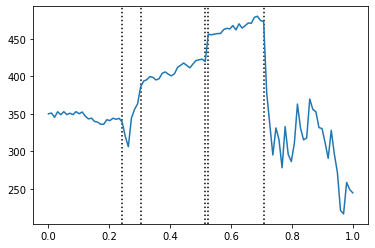

In [313]:
S = 350  
T = 1
r = 0.3

sigmas = [0.1, 1]  
Q = np.array([[-2, 2], [4, -4]])  

GBM_WS(r,sigmas,T,S,Q)

In [81]:
M=10000
S=300
k=200
r=0.1
mu=r
sigma=0.3
T=1
observed_price = np.zeros(M)
for s in range(M):
    observed_price[s] = max(GBM(mu,sigma,T,S)-k,0)
op = np.mean(observed_price) * np.exp(-r*T)

print('op',op)
upper = 1
lower = 0
n=0
while n<100:
    mid=(upper+lower)/2
    diff = op - BS_CALL(S, k , T, r, mid)
    print(diff)
    if abs(diff) < 0.01:
        break
    elif diff>0:
        lower = mid
    elif diff<0:
        upper = mid
    n+=1
print('bs',BS_CALL(S, k , T, r, mid))
print(mid)


op 120.68340731278225
-7.667984821238306
1.1873949137681876
-1.8949526606066769
0.041718464905571295
-0.8326821210463748
-0.3710623523767964
-0.15846922093307114
-0.05681405168589038
-0.007156244313350157
bs 120.6905635570956
0.314453125


In [76]:
BS_CALL(S, k , T, r, 0.001)

119.0325163928081